# Table of Contents

## 1. Department Sales and Orders
## 2. Ordering Habits Based on Customer Loyalty Status
## 3. Top and Bottom Departments by Sales
## 5. Customer Behavior Based on Loyalty and Purchase Frequency

# Importing Libraries and Data

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy

In [2]:
# importing dfs

path = r'C:\Users\Charles Yi\04-2023 Instacart Basket Analysis\02 Data\Prepared Data'

df_1 = pd.read_pickle(os.path.join(path, 'cust_ords_prods_prior_3.pkl'))

df_2 = pd.read_csv(os.path.join(path, 'departments_wrangled.csv'), index_col = False)

In [3]:
# eliminating row and column restrictions

pd.options.display.max_rows = None
pd.options.display.max_columns = None

# 1. Department Sales and Orders

In [4]:
dep_rank = df_1.groupby('department').agg({'prices' : 'sum', 'department' : 'count' }).rename(columns = {'prices' : 'Revenue', 'department' : 'Number of Orders'}).sort_values(by = 'Revenue', ascending = True)
dep_rank

,Revenue,Number of Orders
department,,
other,253708.0,36291
bulk,288648.6,34573
missing,598845.2,69145
pets,770888.4,97716
alcohol,1251654.3,153696
international,2068472.7,269253
babies,3237160.6,423802
personal care,3579129.9,447572
household,5454352.7,738666


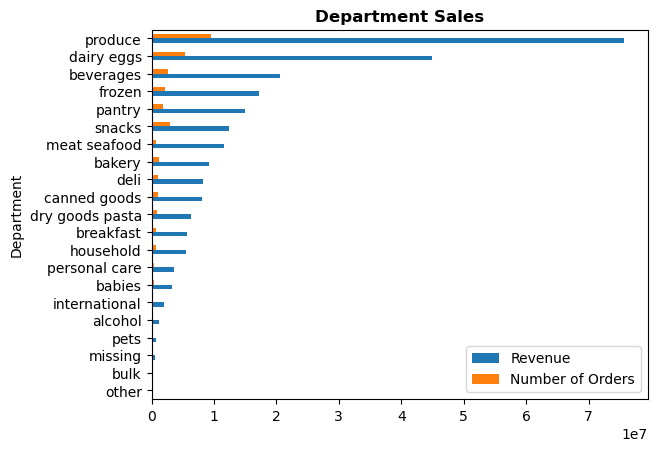

In [5]:
# plotting result

dep_rank_plot = ax = dep_rank.plot(kind = 'barh')
ax.set_title('Department Sales', fontweight = 'bold')
ax.set_ylabel('Department')
ax.legend(loc = 'lower right')

# 2. Ordering Habits Based on Customer Loyalty Status

In [6]:
df_1.groupby('loyalty_flag').agg({'orders_day_of_week': 'mean',
                                  'order_hour_of_day': 'mean',
                                  'days_since_prior_order': 'mean',
                                  'prices': ['mean', 'sum', 'count']}).rename(columns={('prices', 'count') : ('number_of_orders')}).sort_values(by=('prices', 'mean'), ascending=False).round(0)


orders_day_of_week order_hour_of_day days_since_prior_order  \
                               mean              mean                   mean   
loyalty_flag                                                                   
New customer                    3.0              14.0                   18.0   
Regular customer                3.0              13.0                   12.0   
Loyal customer                  3.0              13.0                    6.0   

                 prices                         
                   mean          sum     count  
loyalty_flag                                    
New customer        8.0   48701689.0   6242841  
Regular customer    8.0  123790606.0  15874128  
Loyal customer      8.0   79933825.0  10282763

# 3. Top and Bottom Departments by Sales

In [7]:
# agg revenue per department

rev_per_dep = df_1.groupby('department').agg({'prices' : 'sum'}).rename(columns = {'prices' : 'revenue'}).sort_values(by = 'revenue')

In [8]:
# calculating percentage of revenue using lambda

dep_rev_percentage = lambda x: ((x['revenue'] / rev_per_dep['revenue'].sum()) * 100).round(2)

rev_per_dep['revenue_percentage'] =  rev_per_dep.apply(dep_rev_percentage, axis = 1)

rev_per_dep

,revenue,revenue_percentage
department,,
other,253708.0,0.10
bulk,288648.6,0.11
missing,598845.2,0.24
pets,770888.4,0.31
alcohol,1251654.3,0.50
international,2068472.7,0.82
babies,3237160.6,1.28
personal care,3579129.9,1.42
household,5454352.7,2.16


In [9]:
# top 10 departments

top_departments = rev_per_dep.tail(10)

top_departments

,revenue,revenue_percentage
department,,
canned goods,8053132.0,3.19
deli,8177351.8,3.24
bakery,9208026.0,3.65
meat seafood,11551570.3,4.58
snacks,12345538.0,4.89
pantry,15020660.8,5.95
frozen,17289206.8,6.85
beverages,20646135.1,8.18
dairy eggs,44956125.3,17.81


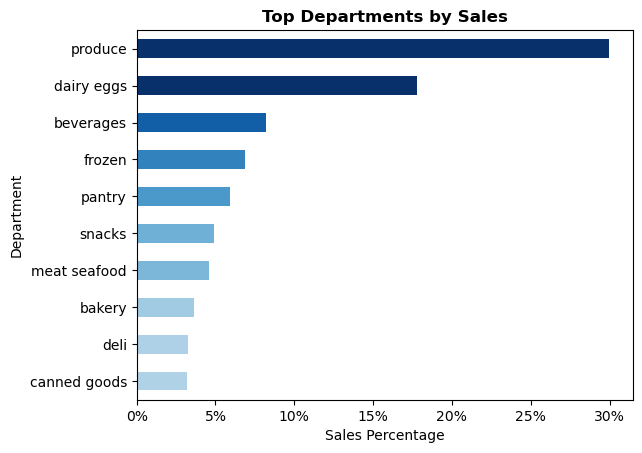

In [10]:
# bar chart of top departments by revenue

color = plt.get_cmap('Blues')

ax = bar_top_deps = top_departments['revenue_percentage'].plot(kind = 'barh', color = color((top_departments['revenue_percentage'])/10))

ax.set_title('Top Departments by Sales', fontweight = 'bold')
ax.set_xlabel('Sales Percentage')
ax.set_ylabel('Department')

def percentage(x, pos):
    return '{:.0f}%'.format(x)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(percentage))

In [11]:
# bottom 11 departments

bottom_departments = rev_per_dep.head(11)

bottom_departments

,revenue,revenue_percentage
department,,
other,253708.0,0.10
bulk,288648.6,0.11
missing,598845.2,0.24
pets,770888.4,0.31
alcohol,1251654.3,0.50
international,2068472.7,0.82
babies,3237160.6,1.28
personal care,3579129.9,1.42
household,5454352.7,2.16


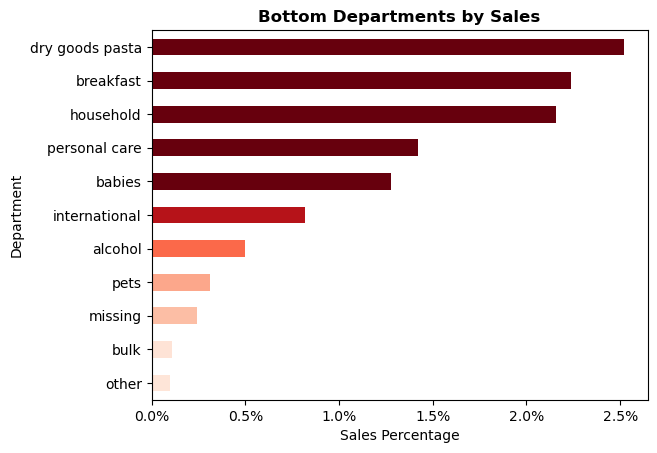

In [12]:
# bar chart of bottom departments by revenue

color = plt.get_cmap('Reds')

bar_bottom_deps = ax = bottom_departments['revenue_percentage'].plot(kind = 'barh', color = color(bottom_departments['revenue_percentage']))

ax.set_title('Bottom Departments by Sales', fontweight = 'bold')
ax.set_xlabel('Sales Percentage')
ax.set_ylabel('Department')

def percentage(x, pos):
    return '{:.1f}%'.format(x)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(percentage))

# 5. Customer Behavior Based on Loyalty and Purchase Frequency

In [13]:
# breaking down customers by loyalty

df_1['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

In [14]:
# grouping users by loyalty and purchase frequency, then aggregating price, max order, and days since prior order

loyalty_frequent_customer = df_1.groupby(['loyalty_flag', 'frequent_customer']).agg({'prices' : 'sum', 'max_order' : 'mean', 'days_since_prior_order' : 'mean'})

In [15]:
# resetting index to convert result to a df

loyalty_frequent_customer = loyalty_frequent_customer.reset_index()

In [16]:
# renaming variables for clarity

loyalty_frequent_customer.loc[loyalty_frequent_customer['frequent_customer'] == 'Frequent customer', 'frequent_customer'] = 'Frequent purchaser'
loyalty_frequent_customer.loc[loyalty_frequent_customer['frequent_customer'] == 'Regular customer', 'frequent_customer'] = 'Regular purchaser'
loyalty_frequent_customer.loc[loyalty_frequent_customer['frequent_customer'] == 'Non-frequent customer', 'frequent_customer'] = 'Non-frequent purchaser'

In [17]:
# concat'ing loyalty flag and frequent customer column to create one overaching profile column

loyalty_frequent_customer['loyalty_purchase_frequency'] = loyalty_frequent_customer['loyalty_flag'].str.cat(loyalty_frequent_customer['frequent_customer'], sep=', ')

In [18]:
# viewing result

loyalty_frequent_customer

,loyalty_flag,frequent_customer,prices,max_order,days_since_prior_order,loyalty_purchase_frequency
0,Loyal customer,Frequent purchaser,79902849.9,63.990330,6.024920,"Loyal customer, Frequent purchaser"
1,Loyal customer,Regular purchaser,30975.3,42.338011,10.455143,"Loyal customer, Regular purchaser"
2,New customer,Frequent purchaser,12879464.6,6.716267,9.752613,"New customer, Frequent purchaser"
3,New customer,Non-frequent purchaser,21224280.7,6.253754,24.093493,"New customer, Non-frequent purchaser"
4,New customer,Regular purchaser,14597906.8,6.918527,16.472798,"New customer, Regular purchaser"
5,Regular customer,Frequent purchaser,75168768.7,26.743940,9.627409,"Regular customer, Frequent purchaser"
6,Regular customer,Non-frequent purchaser,7074597.8,13.302979,21.249458,"Regular customer, Non-frequent purchaser"
7,Regular customer,Regular purchaser,41547239.7,19.178832,15.275500,"Regular customer, Regular purchaser"


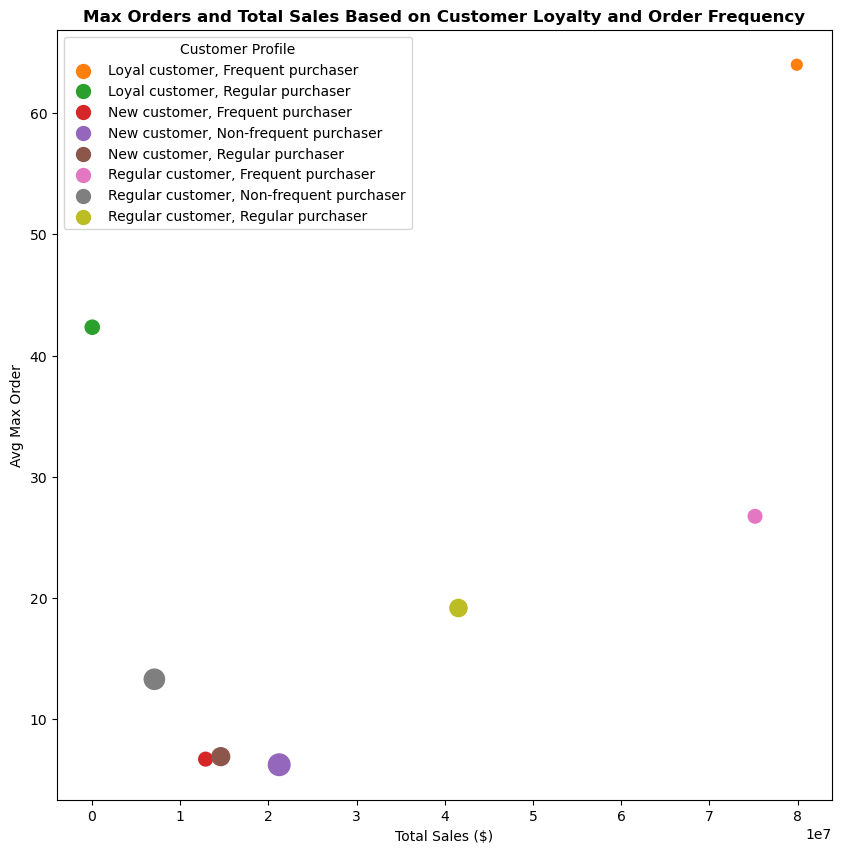

In [19]:
# Defining a color map for the loyalty status categories

cmap = plt.get_cmap('tab20')
loyalty_status_colors = {
    'Loyal customer, Frequent purchaser': cmap(0.1),
    'Loyal customer, Regular purchaser': cmap(0.2),
    'New customer, Frequent purchaser': cmap(0.3),
    'New customer, Non-frequent purchaser': cmap(0.4),
    'New customer, Regular purchaser': cmap(0.5),
    'Regular customer, Frequent purchaser': cmap(0.6),
    'Regular customer, Non-frequent purchaser': cmap(0.7),
    'Regular customer, Regular purchaser': cmap(0.8)
}

colors = loyalty_frequent_customer['loyalty_purchase_frequency'].map(loyalty_status_colors)

# creating scatter plot

scatter_loyalty_order_frequency = ax = loyalty_frequent_customer.plot(kind='scatter', x='prices', y='max_order', s=loyalty_frequent_customer['days_since_prior_order']*10, color = colors, figsize = (10,10))

ax.set_title('Max Orders and Total Sales Based on Customer Loyalty and Order Frequency', fontweight = 'bold')
ax.set_ylabel('Avg Max Order')
ax.set_xlabel('Total Sales ($)')

# creating legend

handles = [plt.scatter([], [], s=100, marker='o', color=cmap(0.1)),
    plt.scatter([], [], s=100, marker='o', color=cmap(0.2)),
    plt.scatter([], [], s=100, marker='o', color=cmap(0.3)),
    plt.scatter([], [], s=100, marker='o', color=cmap(0.4)),
    plt.scatter([], [], s=100, marker='o', color=cmap(0.5)),
    plt.scatter([], [], s=100, marker='o', color=cmap(0.6)),
    plt.scatter([], [], s=100, marker='o', color=cmap(0.7)),
    plt.scatter([], [], s=100, marker='o', color=cmap(0.8))]
                
labels = [
    'Loyal customer, Frequent purchaser',
    'Loyal customer, Regular purchaser',
    'New customer, Frequent purchaser',
    'New customer, Non-frequent purchaser',
    'New customer, Regular purchaser',
    'Regular customer, Frequent purchaser',
    'Regular customer, Non-frequent purchaser',
    'Regular customer, Regular purchaser'
    
]

ax.legend(handles, labels, title = 'Customer Profile', loc = 'upper left')
